In [2]:
from micrograd.nn import MLP
from micrograd.engine import Value
from micrograd.engine import draw_dot

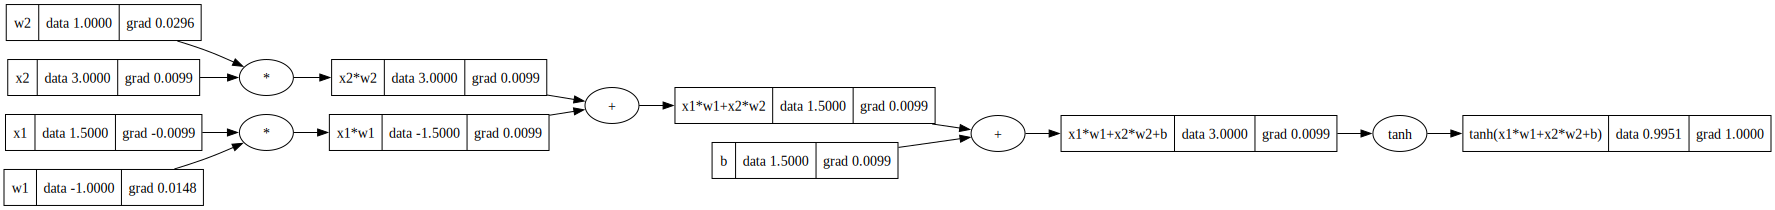

In [8]:
x1 = Value(1.5,label="x1")
w1 = Value(-1,label="w1")
x2 = Value(3.0,label="x2")
w2 = Value(1,label="w2")

b = Value(1.5,label="b")

x1w1 = x1*w1
x2w2 = x2*w2
acti = x1w1+x2w2+b
out = acti.tanh()

out.backward()
draw_dot(out)


In [2]:
xs = [
    [2, 3, -1],
    [3, -1, 0.5],
    [0.5, 1, 1],
    [1, 1, -1],

]
ys = [1, -1, -1, 1]

In [3]:
# Initialize the neural net. 
# Creates a neural net with 3 inputs, 2 layers of 4 neurons each, and 1 output neuron. 
n = MLP(3, [4, 4, 1])


In [4]:
i = 0
l = 1
iterations = 100
while (i < iterations):
  ypred = [n(x) for x in xs]
  loss = sum((des - pred)**2 for des, pred in zip(ys, ypred))

  n.zero_grad()
  loss.backward()

  learning_rate = 0.4 * (1 - 0.9 * i / iterations)
#   learning_rate=0.07
  for p in n.parameters():
    p.data -= learning_rate * p.grad
  print(learning_rate, loss.data, ypred)
  i += 1
  l = loss

0.4 5.006457722615343 [Value(-0.6421643006123766), Value(-0.6013514166744987), Value(-0.39426718145855416), Value(-0.3356351268082211)]
0.39640000000000003 7.142879084500208 [Value(0.9645895689729026), Value(0.7871540400398036), Value(0.9864601669739087), Value(0.9589923413240541)]
0.39280000000000004 3.167837540435864 [Value(0.7818710800349199), Value(-0.7662995022198503), Value(0.7318390740595248), Value(0.7423669011778757)]
0.3892 7.761368221826977 [Value(-0.9750734894837935), Value(-0.9733225760555912), Value(-0.9754655259520536), Value(-0.9644692177787285)]
0.3856 6.998733773960026 [Value(-0.9015030514330172), Value(-0.9093738908737006), Value(-0.9136147309478034), Value(-0.8350325373099948)]
0.382 5.488851462628217 [Value(0.9238474781450583), Value(0.6346583233127687), Value(0.6752481815941127), Value(0.9330078203574751)]
0.3784 7.62240262463026 [Value(-0.9827399865217377), Value(-0.9999072399094008), Value(-0.9999631285835713), Value(-0.9212352173833642)]
0.3748 8.10668452641615

0.10120000000000001 7.203775990038605e-05 [Value(0.9941843570625926), Value(-0.9997611632265897), Value(-0.9998168817240612), Value(0.9938254164660559)]
0.09759999999999996 7.199330236713834e-05 [Value(0.9941861487254576), Value(-0.9997611795747129), Value(-0.9998168829161075), Value(0.9938273288875323)]
0.094 7.195047918659078e-05 [Value(0.9941878750483084), Value(-0.9997611953307781), Value(-0.9998168840651817), Value(0.9938291715615415)]
0.0904 7.190928454210439e-05 [Value(0.9941895362071504), Value(-0.9997612104959337), Value(-0.9998168851713463), Value(0.9938309446763411)]
0.08680000000000004 7.186971284696571e-05 [Value(0.9941911323711262), Value(-0.9997612250712828), Value(-0.9998168862346608), Value(0.9938326484128479)]
0.0832 7.183175874246745e-05 [Value(0.994192663702564), Value(-0.9997612390578857), Value(-0.9998168872551823), Value(0.9938342829446888)]
0.07959999999999999 7.179541709608517e-05 [Value(0.9941941303570232), Value(-0.9997612524567581), Value(-0.999816888232966)

In [5]:
print(l)
print(ypred)

Value(7.151971511548071e-05)
[Value(0.9942052691344444), Value(-0.9997613543130924), Value(-0.9998168956706234), Value(0.9938477377858269)]
